In [1]:
from google.colab import files
uploaded = files.upload()


Saving twitter_training.csv to twitter_training.csv
Saving twitter_validation.csv to twitter_validation.csv


In [2]:
import os
os.listdir()


['.config', 'twitter_validation.csv', 'twitter_training.csv', 'sample_data']

In [4]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the training dataset
train_data = pd.read_csv("twitter_training.csv", header=None)

# Load the validation (testing) dataset
test_data = pd.read_csv("twitter_validation.csv", header=None)


In [6]:
train_data.head()


,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
# Assign column names to training data
train_data.columns = ['id', 'topic', 'sentiment', 'text']

# Assign column names to testing data
test_data.columns = ['id', 'topic', 'sentiment', 'text']


In [8]:
train_data.head()


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
train_data.head()


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
train_data['sentiment'].value_counts()


,count
sentiment,
Negative,22542
Positive,20832
Neutral,18318
Irrelevant,12990


In [11]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [12]:
# Remove rows with missing text
train_data = train_data.dropna(subset=['text'])
test_data = test_data.dropna(subset=['text'])


In [14]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.strip()
    return text


In [15]:
train_data['clean_text'] = train_data['text'].apply(clean_text)
test_data['clean_text'] = test_data['text'].apply(clean_text)


In [16]:
train_data[['text', 'clean_text']].head()


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    stop_words='english'
)


In [18]:
# Features
X_train = tfidf.fit_transform(train_data['clean_text'])
X_test = tfidf.transform(test_data['clean_text'])

# Target labels
y_train = train_data['sentiment']
y_test = test_data['sentiment']


In [19]:
X_train.shape, X_test.shape


((73996, 5000), (1000, 5000))

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)


In [21]:
logistic_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [22]:
y_pred = logistic_model.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.806


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

  Irrelevant       0.79      0.69      0.74       172
    Negative       0.77      0.88      0.82       266
     Neutral       0.84      0.75      0.79       285
    Positive       0.82      0.86      0.84       277

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.80      1000



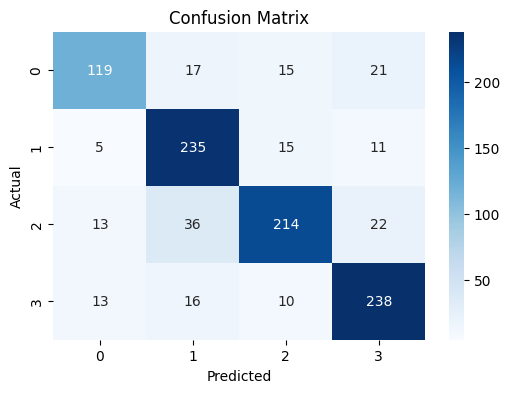

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
